# Exploring the Weather in Athens

In this assignment I will explore the weather in Athens over a period of more than 50 years.

---

> Maria Aspasia Stefadourou <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business, <br />
> mariaspastef@gmail.com

## A1: Obtaining the Data

To begin with, the first step of the assignment, after I import everything needed for this assignment, is to gather all the data needed.

* Firstly, the data downloaded from the National Oceanic and Atmospheric Administration's National Centers for Environmental Information

I downloaded the data concerning the Hellinikon weather station with Start Date 1955-01-01 and End Date	2020-12-31, choosing as custom flags Station Name, Geographic Location, and Data Flags. I made sure to choose metric as a unit and not standard, since we use Celsius in Greece and not Fahrenheit and since I want the two csv files to have the same unit of measurement. I also chose to add Precipitation to the output since it's mentioned in the assignment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# read first csv file
first_data_filename = "data/2762046.csv"
first_data = pd.read_csv(first_data_filename)

first_data.columns
first_data
print(first_data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23251 entries, 0 to 23250
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  23251 non-null  object 
 1   DATE     23251 non-null  object 
 2   PRCP     22773 non-null  float64
 3   TAVG     20940 non-null  float64
dtypes: float64(2), object(2)
memory usage: 726.7+ KB
None


* Secondly, the data downloaded from Hellenic Data Service

I downloaded the data about Athens. The data series consists of meteorological variables for the period 2010-2019.

In [2]:
# read second csv file
second_data_filename = "data/athens.csv"
second_data = pd.read_csv(second_data_filename, header = None)

second_data.columns
second_data 
print(second_data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3652 non-null   object 
 1   1       3652 non-null   object 
 2   2       3652 non-null   object 
 3   3       3652 non-null   object 
 4   4       3652 non-null   float64
 5   5       3652 non-null   int64  
 6   6       3652 non-null   int64  
 7   7       3652 non-null   float64
 8   8       3652 non-null   float64
 9   9       3652 non-null   float64
 10  10      3652 non-null   float64
 11  11      3652 non-null   float64
 12  12      3652 non-null   object 
 13  13      3652 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 399.6+ KB
None


Upon looking at the data, I decide to keep the columns of the dates, the average temperatures and the percipitation on both files and to also put the same columns in the same sequense, in order to make everything easier and cleaner.

* In the first file I leave out the column stating that the station where everything was observed is the Hellinikon Weather Station, since it's not needed for my calculations later.

In [3]:
#keep columns needed from first file
first_data_changed = first_data.iloc[:, [1, 2, 3]]
first_data_changed

,DATE,PRCP,TAVG
0,1955-01-01,0.0,NaN
1,1955-01-02,2.0,NaN
2,1955-01-03,0.0,NaN
3,1955-01-04,0.0,NaN
4,1955-01-05,0.0,NaN
...,...,...,...
23246,2020-12-27,0.0,16.6
23247,2020-12-28,6.6,14.8
23248,2020-12-29,0.0,16.3
23249,2020-12-30,0.0,16.4


* I see that the second file from the Hellenic Data Service doesn't have a header ready like the first file. So, to be sure I take the right data and work in a cleaner way, I read the documentation where they state what every column represents to locate the right place of the data I am going to need. I see that I only need three of the columns, so I make the right adjustments keeping columns 0, 1 and 10.

In [4]:
#improve and correct columns of second file
second_data_changed = second_data.iloc[:, [0,1,10]]
second_data_changed.columns = ['DATE', 'TAVG', 'PRCP']
second_data_changed = second_data_changed.reindex(columns=['DATE', 'PRCP', 'TAVG'])
second_data_changed

,DATE,PRCP,TAVG
0,2010-01-01,0.2,17.9
1,2010-01-02,0.0,15.6
2,2010-01-03,0.0,13.5
3,2010-01-04,0.0,9.5
4,2010-01-05,0.0,13.4
...,...,...,...
3647,2019-12-27,0.0,10.1
3648,2019-12-28,7.2,8.3
3649,2019-12-29,3.4,6.4
3650,2019-12-30,12.4,4.0


Upon looking at the data of the second file and exploring it, I can see that there are not data missing, but I notice some wrong data. In particular, some values in TAVG are '---' instead of NaN, which I correct and I put as a value NaN.

In [5]:
#replace the wrong data in the second file with NaN
second_data_changed.TAVG.iloc[second_data_changed.TAVG == '---'] = np.NaN

/Users/mariaspastefadourou/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


* Upon looking at the data of the first file and exploring it, I can see that there is data missing. Some dates from the period 2010-2019 are missing and there are also some NaN values.

I saw that from the first file there were 102 values NaN in the period of 2010-2019 that had to be filed by the second file,

In [6]:
#calculate what data is NaN or is missing in the period 2010-2019
sameperiod = first_data_changed.loc[(first_data_changed['DATE'] >= '2010-01-01') & (first_data_changed['DATE'] <= '2019-12-31')]
sameperiod.isna().sum().sum()

102

And specifically from the column PRCP.

In [7]:
sameperiod['PRCP'].isna().sum()

102

I also discovered that there were dates missing from the first file in the period of 2010-2019, So it's clear that the data of the first file needs to be cleaned and corrected by using the second file, to ensure that I have the correct base to answer correctly all the questions after. So I take the Percipitation values missing from the first file and put them on the first (since I already saw above these are the ones missing).

In [8]:
#fill in the 102 PRCP values that are missing from the first file using the values from the second one
first_data_changed.loc[:,'PRCP'].combine_first(first_data_changed['DATE'].map(second_data_changed.set_index('DATE')['PRCP']))

0        0.0
1        2.0
2        0.0
3        0.0
4        0.0
        ... 
23246    0.0
23247    6.6
23248    0.0
23249    0.0
23250    0.0
Name: PRCP, Length: 23251, dtype: float64

And I also insert in the first dataframe all the dates from the second one in the years 2010-2019 that are missing all together. 

In [9]:
#insert in the first dataframe all the dates from the second one in the years 2010-2019 that are missing 
first_data_changed = pd.DataFrame(np.concatenate([first_data_changed, second_data_changed[~second_data_changed.DATE.isin(first_data_changed.DATE)]]), columns=first_data_changed.columns)
first_data_changed

,DATE,PRCP,TAVG
0,1955-01-01,0.0,NaN
1,1955-01-02,2.0,NaN
2,1955-01-03,0.0,NaN
3,1955-01-04,0.0,NaN
4,1955-01-05,0.0,NaN
...,...,...,...
24099,2017-10-02,0.0,18.7
24100,2017-10-08,0.0,17.8
24101,2017-10-15,0.0,20.4
24102,2017-10-27,0.0,17.8


After the data of the main dataframe is corrected and completed using the second one, I sort it in order to have all the dates in the correct order.

In [10]:
#sort the main dataframe to have all the dates in the correct order
first_data_changed['DATE'] = pd.to_datetime(first_data_changed['DATE'])
first_data_changed = first_data_changed.sort_values(by='DATE')
first_data_changed

,DATE,PRCP,TAVG
0,1955-01-01,0.0,NaN
1,1955-01-02,2.0,NaN
2,1955-01-03,0.0,NaN
3,1955-01-04,0.0,NaN
4,1955-01-05,0.0,NaN
...,...,...,...
23246,2020-12-27,0.0,16.6
23247,2020-12-28,6.6,14.8
23248,2020-12-29,0.0,16.3
23249,2020-12-30,0.0,16.4


Lasty, I convert the average temperature and persipitation to float64 to be able to do right all the calculations needed later on.

In [11]:
#convert Average Temperature to float64
first_data_changed['TAVG'] = first_data_changed['TAVG'].astype(np.float64, errors = 'raise')

#convert Percipitation to float64
first_data_changed['PRCP'] = first_data_changed['PRCP'].astype(np.float64, errors = 'raise')

print(first_data_changed.info()) 
first_data_changed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24104 entries, 0 to 23250
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    24104 non-null  datetime64[ns]
 1   PRCP    23626 non-null  float64       
 2   TAVG    21792 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 753.2 KB
None


,DATE,PRCP,TAVG
0,1955-01-01,0.0,NaN
1,1955-01-02,2.0,NaN
2,1955-01-03,0.0,NaN
3,1955-01-04,0.0,NaN
4,1955-01-05,0.0,NaN
...,...,...,...
23246,2020-12-27,0.0,16.6
23247,2020-12-28,6.6,14.8
23248,2020-12-29,0.0,16.3
23249,2020-12-30,0.0,16.4


## A2: Deviation of Summer Temperatures

* At first, I make a copy of the complete data from the first question for this one, to make sure I don't change it.
<br> </br>
* I only take the columns of dates and average temperatures, since they are the ones needed for this question.

In [12]:
q2_data = first_data_changed.copy()

#keep columns of dates and average temperatures needed for this question
q2_data = q2_data.iloc[:, [0, 2]]
q2_data

,DATE,TAVG
0,1955-01-01,NaN
1,1955-01-02,NaN
2,1955-01-03,NaN
3,1955-01-04,NaN
4,1955-01-05,NaN
...,...,...
23246,2020-12-27,16.6
23247,2020-12-28,14.8
23248,2020-12-29,16.3
23249,2020-12-30,16.4


* I also group the data by month and I calculate the Average Temperature for every month of every year.

In [13]:
#group the data by month and calculate mean for every month 
q2_data = q2_data.groupby(q2_data.DATE.dt.to_period('M')).mean()
q2_data

,TAVG
DATE,
1955-01,NaN
1955-02,NaN
1955-03,NaN
1955-04,NaN
1955-05,NaN
...,...
2020-08,28.780645
2020-09,26.130000
2020-10,21.254839


* Then, I only keep on the dataframe the summer months June, July and August.

In [14]:
#only choose the summer months June, July and August
q2_data = q2_data.loc[(q2_data.index.month >= 6) & (q2_data.index.month <= 8), :]
q2_data

,TAVG
DATE,
1955-06,NaN
1955-07,NaN
1955-08,NaN
1956-06,NaN
1956-07,NaN
...,...
2019-07,28.170968
2019-08,29.419355
2020-06,24.673333


* Lastly, I group the data by year and I calculate the Average Temperature for every year from 1955 to 2020.

In [15]:
#group the data by year for the summer months and calculate mean for every year
q2_data = q2_data.groupby(q2_data.index.year).mean()
q2_data

,TAVG
DATE,
1955,NaN
1956,NaN
1957,28.091935
1958,27.054659
1959,NaN
...,...
2016,28.138817
2017,28.058996
2018,27.419964


As the data I need is ready I calculate:
* the baseline mean of the years 1974-1999.

In [16]:
#calculate the mean of the baseline 1974-1999
baseline = q2_data.iloc[(q2_data.index >= 1974) & (q2_data.index <= 1999), 0].mean()
baseline

26.21550822534693

* the mean summer temperature deviation from the baseline of the years 1974-1999, storing it on the new column named DIF.

In [17]:
#calculate mean summer temperature deviation from the baseline of 1974-1999
q2_data['DIF'] = q2_data['TAVG'] - baseline
q2_data['DIF']

DATE
1955         NaN
1956         NaN
1957    1.876427
1958    0.839151
1959         NaN
          ...   
2016    1.923309
2017    1.843488
2018    1.204456
2019    1.802377
2020    1.135818
Name: DIF, Length: 66, dtype: float64

* the 10 years rolling average of the deviation from the mean, storing it on the new column named SMA.

In [18]:
#calculate 10 years rolling average of the deviation from the mean
q2_data['SMA'] = q2_data.TAVG.rolling(10, min_periods=1).mean() - baseline
q2_data['SMA']

DATE
1955         NaN
1956         NaN
1957    1.876427
1958    1.357789
1959    1.357789
          ...   
2016    1.948173
2017    1.929434
2018    1.856366
2019    1.921363
2020    1.863323
Name: SMA, Length: 66, dtype: float64

Then, all that is left is to make the graph. So I create the plots, and I also add everything needed to have a good looking and informative graph for anyone to see, to make sure that it can be interpreted by anyone interested to get information about the Mean Summer Temperature Difference from the 1974-1999 Baseline Mean in Greece adn specifically in Athens.
<br> </br>
On the x axis we see every year from 1955 to 2020, on the y axis we see the Deviation of Summer Temperatures from Baseline of the years 1974-1999. So the graph shows the Mean Summer Temperature Difference from the 1974-1999 Mean. While the blue line represents the 10 years rolling average of the deviation from the mean. Lastly, the difference in color represents with blue the years with temperatures that are below zero and with orange the ones that are above zero.

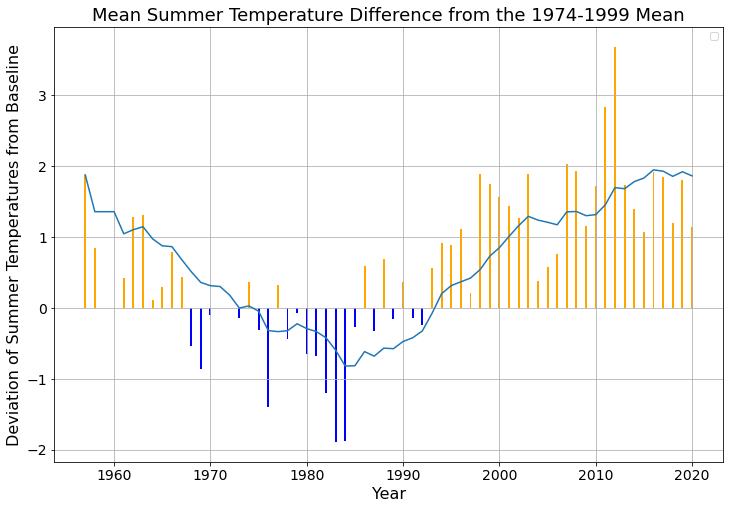

In [19]:
#create plots
plt.figure(figsize=[12,8])
plt.grid(True)
plt.plot(q2_data.index, q2_data['SMA'])
plt.bar(q2_data.index, q2_data['DIF'], color=np.where(q2_data['DIF'] < 0, 'blue', 'orange'), width = 0.2)

#put title and labels
plt.title('Mean Summer Temperature Difference from the 1974-1999 Mean', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Deviation of Summer Temperatures from Baseline', fontsize=16)

#modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend('')
plt.show()

## My interpretation of the figure that shows the Mean Summer Temperature Difference from the 1974-1999 Mean:
* At first, it is noticeable that the summer mean temperature remained relative low between the years 1968-1992. It is important to state that from the graph we can see that the two coolest summers where in 1983 and 1984, while 1976 comes third in the line of coolest summers in Greece and specifically Athens during the stated period of years.
<br> </br>
* Before 1968 the summer temperatures where a bit higher, but we can see that they started to rise again after 1992 with a peak in 2012. And it is actually pretty interesting that 2012 was by far the warmest summer on record in the years 1955-2020 and that the second warmest summer was just one year before in 2011. The summer of 2012 was the most heated summer of Greece and Athens after over 100 years, and the big difference in temperatures from the other years can be seen in the graph. I also did some research and 2012 seems to be the year that the ozone hole above Antarctica reached its max, so it might actually be connected in some way.
<br> </br>
* The graph shows also that before 1992 only for 3 years the deviation of summer temperatures from the 1974-1999 baseline exceeded 1.0 Celsius, but after 1992 it happened for 21 years.
<br> </br>
* Lastly, we see that for 4 years the deviation of summer temperatures from the 1974-1999 baseline was below 1.




## A3: Evolution of Daily Temperatures

* At first, I make a copy of the complete data from the first question for this one, to make sure I don't change it.
<br> </br>
* I also make sure my graph of the Daily Average Temperatures for all he years 1955-2020 is going to appear very informative and in the best way possible, so that we can all interpret it easily. So, that is why  I chose to remove all the dates of 29/02 from the data of this question, so that the graph won't be influenced at all by the difference between leap years and not leap years.

In [20]:
q3_data = first_data_changed.copy()

#remove date of leap years from the data
q3_data = q3_data[~((q3_data.DATE.dt.month == 2) & (q3_data.DATE.dt.day == 29))]
q3_data

,DATE,PRCP,TAVG
0,1955-01-01,0.0,NaN
1,1955-01-02,2.0,NaN
2,1955-01-03,0.0,NaN
3,1955-01-04,0.0,NaN
4,1955-01-05,0.0,NaN
...,...,...,...
23246,2020-12-27,0.0,16.6
23247,2020-12-28,6.6,14.8
23248,2020-12-29,0.0,16.3
23249,2020-12-30,0.0,16.4


* I put year, month and day separately as columns, to make the calculations following easier and cleaner.

In [21]:
#put year, month and day as columns to the dataframe to make it easier for pivoting
q3_data['DAY'] = q3_data['DATE'].dt.day
q3_data['MONTH'] = q3_data['DATE'].dt.month
q3_data['YEAR'] = q3_data['DATE'].dt.year
q3_data

,DATE,PRCP,TAVG,DAY,MONTH,YEAR
0,1955-01-01,0.0,NaN,1,1,1955
1,1955-01-02,2.0,NaN,2,1,1955
2,1955-01-03,0.0,NaN,3,1,1955
3,1955-01-04,0.0,NaN,4,1,1955
4,1955-01-05,0.0,NaN,5,1,1955
...,...,...,...,...,...,...
23246,2020-12-27,0.0,16.6,27,12,2020
23247,2020-12-28,6.6,14.8,28,12,2020
23248,2020-12-29,0.0,16.3,29,12,2020
23249,2020-12-30,0.0,16.4,30,12,2020


* I smooth the line corresponding to each year by using a 30 days rolling average for every value.

In [22]:
#smooth the line corresponding to each year via a 30 days rolling average
q3_data['TAVG'] = q3_data.TAVG.rolling(window=30, min_periods=1).mean()
q3_data['TAVG']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
23246    14.086667
23247    14.153333
23248    14.153333
23249    14.193333
23250    14.293333
Name: TAVG, Length: 24087, dtype: float64

* I only take the columns of dates and smoothed temperatures, since they are the ones needed for this question.

In [23]:
#keep columns of dates and average temperatures needed for this question
q3_data = q3_data.iloc[:, [2, 3, 4, 5]]
q3_data

,TAVG,DAY,MONTH,YEAR
0,NaN,1,1,1955
1,NaN,2,1,1955
2,NaN,3,1,1955
3,NaN,4,1,1955
4,NaN,5,1,1955
...,...,...,...,...
23246,14.086667,27,12,2020
23247,14.153333,28,12,2020
23248,14.153333,29,12,2020
23249,14.193333,30,12,2020


* I make a pivot table to set the years as columns and months and days as indexes.

In [24]:
#make pivot table and set the years as columns and months and days as indexes
q3_pivot = q3_data.pivot(index = ['MONTH', 'DAY'], columns = 'YEAR', values='TAVG')
q3_pivot

YEAR       1955  1956       1957       1958       1959  1960       1961  \
MONTH DAY                                                                 
1     1     NaN   NaN        NaN  11.503333  13.034483   NaN  12.000000   
      2     NaN   NaN        NaN  11.770000  13.153571   NaN  12.100000   
      3     NaN   NaN        NaN  12.020000  13.300000   NaN  12.600000   
      4     NaN   NaN        NaN  12.243333  13.453846   NaN  12.900000   
      5     NaN   NaN        NaN  12.346667  13.552000   NaN  13.380000   
...         ...   ...        ...        ...        ...   ...        ...   
12    27    NaN   NaN  10.690000  12.976667        NaN   NaN  12.796667   
      28    NaN   NaN  10.636667  12.983333        NaN   NaN  12.766667   
      29    NaN   NaN  10.626667  13.086667        NaN   NaN  12.770000   
      30    NaN   NaN  10.776667  13.130000        NaN   NaN  12.676667   
      31    NaN   NaN  11.160000  13.036667        NaN   NaN  12.526667   

YEAR            1962       1963       1964  ...       2011       2012  \
MONTH DAY                                   ...                         
1     1    12.366667  11.560000  13.426667  ...  13.093333  12.683333   
      2    12.283333  11.630000  13.430000  ...  12.806667  12.560000   
      3    12.320000  11.703333  13.326667  ...  12.530000  12.426667   
      4    12.220000  11.920000  13.110000  ...  12.410000  12.266667   
      5    12.033333  12.110000  12.800000  ...  12.340000  12.020000   
...              ...        ...        ...  ...        ...        ...   
12    27   11.580000  14.133333  13.536667  ...  13.013333  12.320000   
      28   11.543333  13.956667  13.476667  ...  12.966667  12.180000   
      29   11.413333  13.733333  13.276667  ...  12.793333  11.943333   
      30   11.386667  13.583333  13.096667  ...  12.763333  11.666667   
      31   11.450000  13.473333  12.943333  ...  12.746667  11.483333   

YEAR            2013       2014       2015       2016       2017       2018  \
MONTH DAY                                                                     
1     1    11.316667  10.473333  12.626667  10.896667   8.996667  11.960000   
      2    11.186667  10.516667  12.116667  10.670000   8.806667  11.806667   
      3    11.216667  10.620000  11.746667  10.600000   8.726667  11.693333   
      4    11.190000  10.676667  11.580000  10.650000   8.730000  11.650000   
      5    11.143333  10.713333  11.223333  10.820000   8.830000  11.710000   
...              ...        ...        ...        ...        ...        ...   
12    27   10.783333  14.033333  11.906667   9.983333  12.630000  10.970000   
      28   10.853333  13.990000  11.803333   9.723333  12.676667  10.710000   
      29   10.910000  13.900000  11.703333   9.466667  12.693333  10.733333   
      30   10.880000  13.483333  11.616667   9.310000  12.493333  10.796667   
      31   10.673333  13.090000  11.260000   9.183333  12.210000  10.803333   

YEAR            2019       2020  
MONTH DAY                        
1     1    10.713333  12.340000  
      2    10.606667  12.106667  
      3    10.446667  11.983333  
      4    10.210000  11.960000  
      5    10.020000  11.916667  
...              ...        ...  
12    27   13.910000  14.086667  
      28   13.613333  14.153333  
      29   13.160000  14.153333  
      30   12.700000  14.193333  
      31   12.443333  14.293333  

[365 rows x 66 columns]

* I calculate the average daily temperature for the baseline period of 1974-1999. For this calculation I used the smoothed temperatures, so that everything we want to see in the graph can be shown in a more clear way.

In [25]:
#calculate baseline of 1974-1999
q3_base = q3_pivot.iloc[: , (q3_pivot.columns >= 1974) & (q3_pivot.columns <= 1999)]
q3_base = q3_base.mean(axis=1)
q3_base

MONTH  DAY
1      1      11.268205
       2      11.223205
       3      11.163205
       4      11.073205
       5      10.987051
                ...    
12     27     11.620641
       28     11.527436
       29     11.451282
       30     11.410000
       31     11.365000
Length: 365, dtype: float64

* As the data I need is ready all that is left is to make the graph. So I create the plots, and I also add everything needed to have a good looking and informative graph for anyone to see, to make sure that it can be interpreted by anyone interested to get information about the Average Daily Temperatures here in Greece.
<br> </br>
* On the x axis we see every Month of the year, on the y axis we see the Average Temperatures. So the graph shows the Average Daily Temperatures of every year from 1955 to 2020. While the black line represents the average daily temperature for the baseline period of 1974-1999.
<br> </br>
* What is more, the lines are colored from light orange to dark orange, progressing through the years in ascending order, in order to show in detail in a more clear way the difference in Average Daily Temperatures over the years.
<br> </br>
* To put on the x axis the months as labels and not as numbers (as they are in the data) I import ticker and I used it to mark the plot every 30 days and to show the month each part of the plot represents.
<br> </br>
* Lastly, I have to note that in order to make the lines change color from light orange to dark orange through the years, I used cmap='Oranges', which I found from this source that was very helpful: https://matplotlib.org/stable/tutorials/colors/colormaps.html

<ipython-input-26-00c481b9b5a3>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(xticklabels = (['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']))


<function matplotlib.pyplot.show(close=None, block=None)>

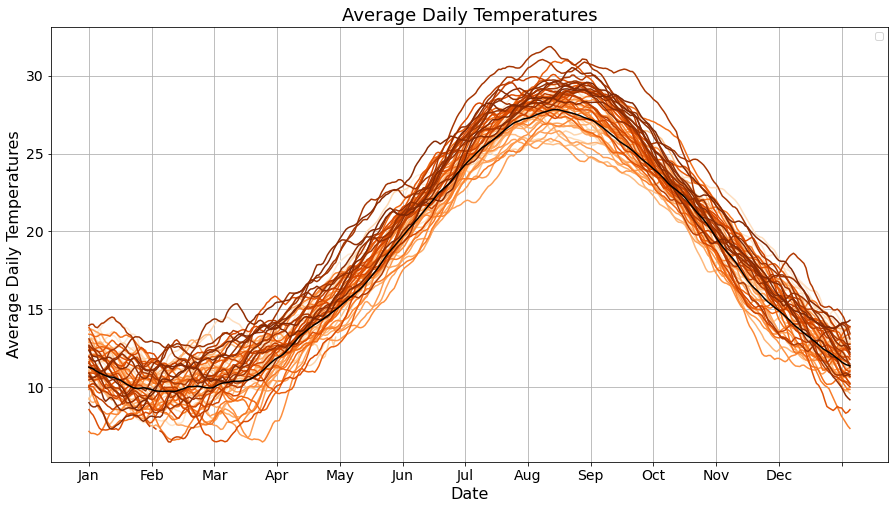

In [26]:
import matplotlib.ticker as ticker

#create plots
ax = q3_pivot.plot(figsize=(15,8), cmap='Oranges')
ax = q3_base.plot(figsize=(15,8), color = 'black')

#set x axis and x axis labels
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(30))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set(xticklabels = (['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']))

#put title and labels
plt.title('Average Daily Temperatures', fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Average Daily Temperatures', fontsize=16)

#modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend('')
plt.grid(True)
plt.show

## My interpretation of the figure that shows the Average Daily Temperatures:
* At first, the way that the graph is made and coloured helps us see that in general the average daily temperature gets higher as the years progress, showing the effects of Global Warming in Greece, Athens.
<br> </br>
* The black line that represents the average daily temperature for the baseline period of 1974-1999 appears to be mostly in the middle of the plots of the years 1955-2020.
<br> </br>
* What is more, we can see that the warmest month in general is August and the coldest months are December and January.
<br> </br>
* It is also noticeable that the average daily temperatures that are pretty low on January begin to increase on March, they reach a peak of high temperatures on August and then they begin to decrease again.
<br> </br>
* Lastly, it is clear that there are some years whose average daily temperatures deviate from the rest years and reach all time highest and all time lowest average temperatures. What is interesting is that most years that deviate from the rest with lower temperatures are closer to the starting year of 1955 and most years that deviate from the rest with higher temperatures are closer to the last year we observe of 2020, which once again shows the effects of Global Warming.

## A4: Extreme Temperature Events

* At first, I make two copies of the complete data from the first question for this one, to make sure I don't change it.
<br> </br>
* I put year, month and day separately as columns, to make the calculations following easier and cleaner.

In [27]:
q4_data = first_data_changed.copy()
q4_count_all = first_data_changed.copy()

#put year, month and day as columns to the dataframe to make it easier for pivoting
q4_data['DAY'] = q4_data['DATE'].dt.day
q4_data['MONTH'] = q4_data['DATE'].dt.month
q4_data['YEAR'] = q4_data['DATE'].dt.year
q4_data

,DATE,PRCP,TAVG,DAY,MONTH,YEAR
0,1955-01-01,0.0,NaN,1,1,1955
1,1955-01-02,2.0,NaN,2,1,1955
2,1955-01-03,0.0,NaN,3,1,1955
3,1955-01-04,0.0,NaN,4,1,1955
4,1955-01-05,0.0,NaN,5,1,1955
...,...,...,...,...,...,...
23246,2020-12-27,0.0,16.6,27,12,2020
23247,2020-12-28,6.6,14.8,28,12,2020
23248,2020-12-29,0.0,16.3,29,12,2020
23249,2020-12-30,0.0,16.4,30,12,2020


* I only take the columns of dates and average temperatures, since they are the ones needed for this question.

In [28]:
#keep columns of dates and average temperatures needed for this question
q4_data = q4_data.iloc[:, [2, 3, 4, 5]]
q4_data

,TAVG,DAY,MONTH,YEAR
0,NaN,1,1,1955
1,NaN,2,1,1955
2,NaN,3,1,1955
3,NaN,4,1,1955
4,NaN,5,1,1955
...,...,...,...,...
23246,16.6,27,12,2020
23247,14.8,28,12,2020
23248,16.3,29,12,2020
23249,16.4,30,12,2020


* I make a pivot table to set the years as columns and months and days as indexes.

In [29]:
#make pivot table and set the years as columns and months and days as indexes
q4_pivot = q4_data.pivot(index = ['MONTH', 'DAY'], columns = 'YEAR', values='TAVG')

* I calculate the baseline mean of the years 1974-1999 and I also multiply it by 1.1, since this is the value the temperatures have to surpass to be concidered extreme heat events.

In [30]:
#calculate baseline of 1974-1999
q4_base = q4_pivot.iloc[: , (q4_pivot.columns >= 1974) & (q4_pivot.columns <= 1999)]
q4_base = q4_base.mean(axis=1)
q4_base = q4_base * 1.1
q4_base

MONTH  DAY
1      1      11.401923
       2      11.778462
       3      11.228462
       4      10.598077
       5      10.911154
                ...    
12     27     10.746154
       28     11.228462
       29     11.854615
       30     12.489231
       31     12.108462
Length: 366, dtype: float64

* I see what temperatures from the pivot table are 10% above the baseline, and I put True or False in each case.

In [31]:
#get for every date true if its an extreme heat event
q4_pivot = q4_pivot.ge(q4_base, axis='index')
q4_pivot

YEAR        1955   1956   1957   1958   1959   1960  1961   1962   1963  \
MONTH DAY                                                                 
1     1    False  False  False   True  False  False  True   True   True   
      2    False  False  False   True  False  False  True   True   True   
      3    False  False  False   True  False  False  True   True   True   
      4    False  False  False  False  False  False  True   True   True   
      5    False  False  False  False  False  False  True  False   True   
...          ...    ...    ...    ...    ...    ...   ...    ...    ...   
12    27   False  False  False   True  False  False  True   True  False   
      28   False  False  False   True  False  False  True   True   True   
      29   False  False   True   True  False  False  True   True  False   
      30   False  False   True  False  False  False  True   True  False   
      31   False  False   True  False  False  False  True   True  False   

YEAR        1964  ...   2011   2012   2013   2014   2015   2016   2017   2018  \
MONTH DAY         ...                                                           
1     1    False  ...  False  False  False  False  False  False  False  False   
      2    False  ...  False  False  False  False  False  False  False   True   
      3    False  ...  False  False   True  False  False   True  False   True   
      4    False  ...  False   True   True   True   True   True   True  False   
      5    False  ...  False   True   True   True  False   True   True  False   
...          ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
12    27    True  ...  False   True   True   True   True   True   True  False   
      28    True  ...  False   True   True   True   True  False   True  False   
      29   False  ...  False   True   True   True   True  False   True  False   
      30    True  ...  False  False  False  False  False  False  False  False   
      31    True  ...  False  False  False  False  False  False  False  False   

YEAR        2019   2020  
MONTH DAY                
1     1    False  False  
      2    False  False  
      3    False  False  
      4    False  False  
      5    False  False  
...          ...    ...  
12    27   False   True  
      28   False   True  
      29   False   True  
      30   False   True  
      31   False   True  

[366 rows x 66 columns]

* I unpivot the dataframe and make it look like how the data was at the beginning, with every date under the other.

In [32]:
#unpivot the dataframe
q4_pivot = q4_pivot.reset_index()
q4_unpivot = pd.melt(q4_pivot, id_vars = ['DAY', 'MONTH'], value_name='TAVG')
q4_unpivot

,DAY,MONTH,YEAR,TAVG
0,1,1,1955,False
1,2,1,1955,False
2,3,1,1955,False
3,4,1,1955,False
4,5,1,1955,False
...,...,...,...,...
24151,27,12,2020,True
24152,28,12,2020,True
24153,29,12,2020,True
24154,30,12,2020,True


* I only keep the columns needed, to make further calculations easier.

In [33]:
#keep the columns needed
q4_data = q4_data.iloc[:, [0, 3]]
q4_data

,TAVG,YEAR
0,NaN,1955
1,NaN,1955
2,NaN,1955
3,NaN,1955
4,NaN,1955
...,...,...
23246,16.6,2020
23247,14.8,2020
23248,16.3,2020
23249,16.4,2020


* I group the data by year and I calculate the Average Temperature for every year.

In [34]:
#group the data by year and calculate the mean for every year
q4_data = q4_data.groupby('YEAR').mean()
q4_data

,TAVG
YEAR,
1955,NaN
1956,NaN
1957,21.271739
1958,18.710959
1959,NaN
...,...
2016,19.372131
2017,19.181370
2018,19.512055


* I group the data by year and count the number of extreme temperature events per year, always compared to the baseline of 1974-1999. I store it on a new column named COUNT.

In [35]:
#group the data by year and count the number of extreme temperature events per year, compared to the baseline of 1974-1999
q4_data['COUNT'] = q4_unpivot[q4_unpivot['TAVG'] == True].groupby('YEAR')['TAVG'].count()
q4_data['COUNT']

YEAR
1955      NaN
1956      NaN
1957     52.0
1958    130.0
1959      NaN
        ...  
2016    159.0
2017    170.0
2018    173.0
2019    163.0
2020    168.0
Name: COUNT, Length: 66, dtype: float64

* I group the data by year and count the number of days per year. I store it on a new column named ALL.

In [36]:
#group the data by year and count the number of days per year
q4_data['ALL'] = q4_count_all.groupby(q4_count_all.DATE.dt.year).TAVG.count()
q4_data['ALL']

YEAR
1955      0
1956      0
1957    184
1958    365
1959      0
       ... 
2016    366
2017    365
2018    365
2019    365
2020    366
Name: ALL, Length: 66, dtype: int64

* Lastly, I calculate the percentage of extreme heat events calculated over the number of observations for each year. I store it on a new column named PERCENT.

In [37]:
#calculate the percentage of extreme heat events calculated over the number of observations for each year
q4_data['PERCENT'] = q4_data['COUNT'] / q4_data['ALL']
q4_data

,TAVG,COUNT,ALL,PERCENT
YEAR,,,,
1955,NaN,NaN,0,NaN
1956,NaN,NaN,0,NaN
1957,21.271739,52.0,184,0.282609
1958,18.710959,130.0,365,0.356164
1959,NaN,NaN,0,NaN
...,...,...,...,...
2016,19.372131,159.0,366,0.434426
2017,19.181370,170.0,365,0.465753
2018,19.512055,173.0,365,0.473973


Now, concerning the average percentage of extreme temperature events of the baseline:
* At first, I gather the data for the years 1974-1999.

In [38]:
#keep data of years 1974-1999
q4_line_data = q4_data.iloc[(q4_data.index >= 1974) & (q4_data.index <= 1999) , :]
q4_line_data

,TAVG,COUNT,ALL,PERCENT
YEAR,,,,
1974,17.963510,64.0,359,0.178273
1975,18.160440,95.0,364,0.260989
1976,17.427397,76.0,365,0.208219
1977,18.340274,118.0,365,0.323288
1978,17.652329,77.0,365,0.210959
1979,18.183014,116.0,365,0.317808
1980,17.326776,63.0,366,0.172131
1981,17.681096,91.0,365,0.249315
1982,16.953973,51.0,365,0.139726


* Lastly, I calculate the average percentage of extreme temperature events of the baseline 1974-1999, that is going to be the grey line on the graph.

In [39]:
#calculate the average percentage of extreme temperature events of the baseline 1974-1999
average = q4_line_data['PERCENT'].mean()
average

0.24865917721445646

As the data I need to make the graph is ready, all that is left is to make the graph. So I create the plots, and I also add everything needed to have a good looking and informative graph for anyone to see, to make sure that it can be interpreted by anyone interested to get information about extreme events here in Greece.
<br> </br>
On the x axis we see every year from 1955 to 2020, on the y axis we see the Percentage of Extreme Heat Events Calculated Over the Number of Observations. So the graph shows the Percentage of Extreme Heat Events Calculated Over the Number of Observations per Year. While the grey line representsthe average percentage of extreme tempearture events of the baseline of years 1974-1999. Lastly, the difference in color represents with blue the years with temperatures that are below the average percentage of extreme tempearture events of the baseline and with orange the years that are above it.

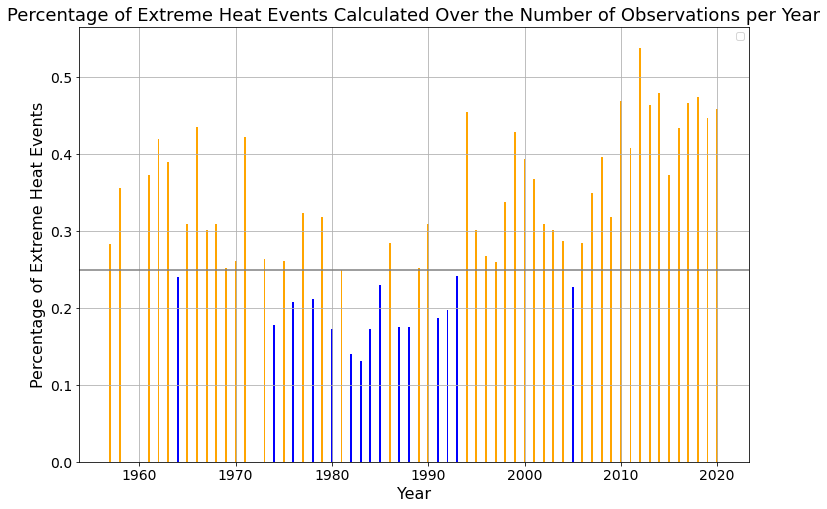

In [40]:
#create plots
plt.figure(figsize=[12,8])
plt.grid(True)
plt.bar(q2_data.index, q4_data['PERCENT'], color=np.where(q4_data['PERCENT'] < average, 'blue', 'orange'), width = 0.2)
plt.axhline(y=average, color='grey', linestyle='-')

#put title and labels
plt.title('Percentage of Extreme Heat Events Calculated Over the Number of Observations per Year', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Percentage of Extreme Heat Events', fontsize=16)

#modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend('')
plt.show()

## My interpretation of the figure that shows the Percentage of Extreme Heat Events Calculated Over the Number of Observations per Year:
* Only with a quick first glance, it is clear that the majority of the years are orange and therefore over the average percentage of extreme temperature events of the baseline. Only 15 years are below the baseline and therefore have a lower percentage of extreme heat events than the baseline years of 1974-1999.
<br> </br>
* It is also noticeable that the percentage of extreme heat events remained relative high in the first years till 1971, with the highest percentage of these years to be of 1966 with a value of over 0.4. Close second and third in line of this period appear to be years 1962 and 1971. 
<br> </br>
* What is more, we can see that after 1971 the percentage of extreme heat events started to fall reaching an all time low in 1983, with 1982 coming close second. 
<br> </br>
* What is very interesting is seeing the graph of the questions 2 and 4 together. On the graph of the second question where we saw the Deviation of Summer Temperatures, the year 1983 appeared to be the coolest summer in Greece between the years 1955-2020. So we can make the deduction now, that 1983 was not only the coolest summer, but also the summer with the lowest percentage of extreme heat events.
<br> </br>
* From 1994 the percentage of extreme heat events that are 10% above the baseline percentage of years 1974-1999 is on the rise again and we can see that in this period only in 2005 the percentage of extreme heat events remained below the baseline.
<br> </br>
* The year with by far the highest percentage of extreme heat events is 2012 with a value over 0.5, being the only year that high up on the graph. It is important to underline now that as we saw on the graph of the question 2 concerning the Deviation of Summer Temperatures, the year 2012 was the peak of the graph, as the warmest summer of Greece and Athens in over 100 years. So, this graph shows us what we expected, and we can now make the conclusion that 2012 was a year with an extremely warm summer and also with a very high percentage of extreme heat events.
<br> </br>
* Lastly, what I also found important that can be seen in the graph, is that from 2010 till 2020 all years but one have a percentage of extreme heat events over 0.4, which is among other of my findings a bit alarming, since we see how Global Warming affects Greece. It is obvious that the percentage of extreme heat events is on the increase the last years.

## A5: Precipitation

* At first, I make two copies of the complete data from the first question for this one, to make sure I don't change it.
<br> </br>
* I only take the columns of dates and percipitation, since they are the ones needed for this question.

In [41]:
q5_data = first_data_changed.copy()
q5_count = first_data_changed.copy()

#keep columns of dates and percipitation needed for this question
q5_data = q5_data.iloc[:, [0, 1]]
q5_data

,DATE,PRCP
0,1955-01-01,0.0
1,1955-01-02,2.0
2,1955-01-03,0.0
3,1955-01-04,0.0
4,1955-01-05,0.0
...,...,...
23246,2020-12-27,0.0
23247,2020-12-28,6.6
23248,2020-12-29,0.0
23249,2020-12-30,0.0


* Secondly, I group the data by year and I calculate the sum of Percipitation for every year.

In [42]:
#group the data by year and calculate sum for every year
q5_data = q5_data.groupby(q5_data.DATE.dt.to_period('Y')).sum()
q5_data

,PRCP
DATE,
1955,547.0
1956,281.3
1957,303.2
1958,350.0
1959,214.0
...,...
2016,243.6
2017,303.5
2018,379.0


* Then, I group the data by year for every Percipitation that is over zero (0) and thus I count the number of rainy days for every year and store it on a new column named COUNT.

In [43]:
#group the data by year and count the number of rainy days for every year
q5_data['COUNT'] = q5_count[q5_count['PRCP'] > 0.0].groupby(q5_count.DATE.dt.to_period('Y'))['PRCP'].count()
q5_data['COUNT']

DATE
1955    68
1956    52
1957    73
1958    68
1959    62
        ..
2016    38
2017    47
2018    52
2019    58
2020    38
Freq: A-DEC, Name: COUNT, Length: 66, dtype: int64

* Lastly, I store on a new column named RESULT the division of the rainfall by the number of rainy days, which will allow me later on to get an indication of whether we are getting rain in more concentrated bursts. I store it on a new column named RESULT.

In [44]:
#calculate the ratio of rainfall over rainy days
q5_data['RESULT'] = q5_data['PRCP']/q5_data['COUNT']
q5_data

,PRCP,COUNT,RESULT
DATE,,,
1955,547.0,68,8.044118
1956,281.3,52,5.409615
1957,303.2,73,4.153425
1958,350.0,68,5.147059
1959,214.0,62,3.451613
...,...,...,...
2016,243.6,38,6.410526
2017,303.5,47,6.457447
2018,379.0,52,7.288462


* I also calculate the 10 years rolling average. I store it on a new column named SMA.

In [45]:
#calculate 10 years rolling average
q5_data['SMA'] = q5_data.RESULT.rolling(10, min_periods=1).mean()

Then, all that is left is to make the graph. So I create the plots, and I also add everything needed to have a good looking and informative graph for anyone to see, to make sure that it can be interpreted by anyone interested to get an indication of whether we are getting rain in more concentrated bursts here in Greece.
<br> </br>
On the x axis we see every year from 1955 to 2020, on the y axis we see the Ratio of Rainfall Over Rainy Days. So the graph shows tRatio of Rainfall Over Rainy Days per Year. While the light blue line represents the 10 years rolling average.

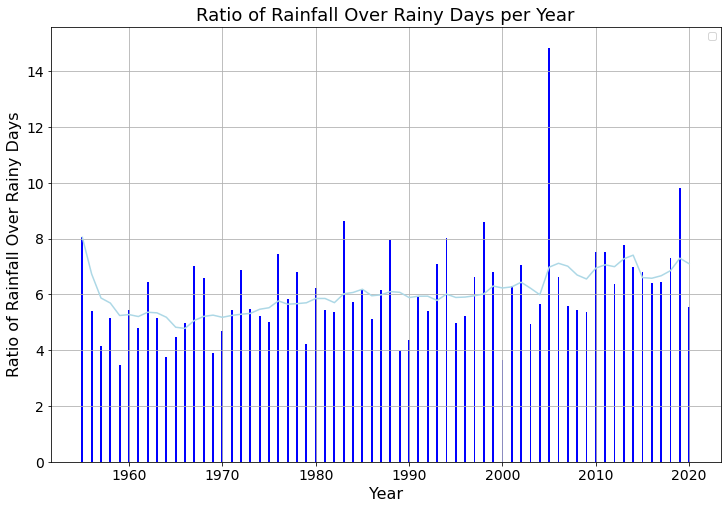

In [46]:
#create plots
plt.figure(figsize=[12,8])
plt.grid(True)
plt.bar(q2_data.index, q5_data['RESULT'], color = 'blue', width = 0.2)
plt.plot(q2_data.index, q5_data['SMA'], color = 'LightBlue')

#put title and labels
plt.title('Ratio of Rainfall Over Rainy Days per Year', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Ratio of Rainfall Over Rainy Days', fontsize=16)

#modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend('')
plt.show()

## My interpretation of the figure that shows the Ratio of Rainfall Over Rainy Days per Year:
* Only with a quick first glance, it is clear that the majority of the years have a ratio of rainfall over rainy days that is very similar and close to one another. 
<br> </br>
* Most of the differences in values of the ratio of rainfall over rainy days don't deviate more than the value of 4. 
<br> </br>
* The big exception is the year 2005 that has an outstandingly higher concentrated burst of rain, reaching an all time high of over 14, when every single one of the other years are under 10.
<br> </br>
* The second year that follows 2005, but is still vey much far away is year 2019.
<br> </br>
* Apart from 2005, that in my eyes as it is shown in the graph is a year of a very extreme rainfall, the rest years' ratio of rainfall over rainy days appears to fluctuate in a close range. The overall fluctuations between the years are constant but still very close.
<br> </br>
* I conclude that the ratio of rainfall over rainy days over the years in general is not as alarming as the increase of temperatures and extreme heat events over the last years, as shown on the other three graphs before.